# Superposition  et manipulation des qubits

### Crédit Agricole : Ateliers Quantiques 2025
#### Atelier 2 — Partie 1

## Motivation

L’objectif de ce tutoriel est de montrer comment un ordinateur quantique peut stocker des informations encodées sous forme de chaînes de bits en utilisant significativement moins de qubits que de bits classiques. Cela est rendu possible grâce à **l’effet de superposition**. Nous allons expliquer ce concept à travers un exemple concret.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import math
import matplotlib.pyplot as plt

# Use Aer's simulator
backend = AerSimulator()
backend_vec = AerSimulator(method='statevector')


## Bit vs Qubit

Un bit classique peut stocker et manipuler deux états : `0` et `1`. Ces deux états correspondent aux deux états de base (orthonormés) d’un qubit :

\$ \left| 0 \right\rangle = {\begin{bmatrix}1 \ 0\end{bmatrix}} \$,

\$ \left| 1 \right\rangle = {\begin{bmatrix}0 \ 1\end{bmatrix}} \$.

En réalité, l’état d’un qubit est représenté par une *superposition linéaire* de ces deux états de base :

\$ \left| q \right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle \$,
ce qui peut s’écrire
\$ \left|q\right\rangle = {\begin{bmatrix}\alpha \ 0\end{bmatrix}} +  {\begin{bmatrix}0 \ \beta \end{bmatrix}} =  {\begin{bmatrix} \alpha \ \beta \end{bmatrix}} \$.

Les coefficients \$ \alpha \$ et \$ \beta \$ sont appelés amplitudes de probabilité et sont des nombres complexes. La formule \$|\alpha|^2\$ donne la probabilité que le qubit soit mesuré dans l’état \$\left| 0 \right\rangle\$. Ces coefficients doivent satisfaire la condition de normalisation \$|\alpha|^2 + |\beta|^2  = 1\$ pour que la somme des probabilités soit égale à 1.

Ainsi, un qubit peut exister dans une *superposition* d’états. Lors de la mesure, on ne peut observer qu’un seul état, mais cette mesure est gouvernée par les probabilités associées à chaque composante. En informatique quantique, en plus des états de base \$\left| 0 \right\rangle\$ et \$\left| 1 \right\rangle\$, on utilise souvent les états en superposition notés \$\left| + \right\rangle\$, \$\left| - \right\rangle\$. Dans ces états, les probabilités sont égales (\$|\alpha|^2 = 0{,}5\$ et \$|\beta|^2 = 0{,}5\$), ce qui signifie que le qubit a autant de chances d’être mesuré dans l’état \$\left| 0 \right\rangle\$ que dans l’état \$\left| 1 \right\rangle\$. Tout état pour lequel \$\alpha\$ et \$\beta\$ sont non nuls est un état de superposition. Il existe aussi des états dits mixtes qui ne peuvent pas être décrits par un seul vecteur ket, mais nécessitent des matrices.

On peut faire passer un qubit de l’état \$\left| 0 \right\rangle\$ à l’état \$\left| + \right\rangle\$, puis revenir à \$\left| 0 \right\rangle\$ en appliquant une *porte de Hadamard*. Il n’existe pas d’opération équivalente pour les bits classiques, qui ne peuvent exister que dans deux états distincts : `0` ou `1`.


### Mathématiques

La porte de Hadamard est représentée par la matrice :

\$H =  \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}}\$.

Pour créer un état de superposition à partir de l’état \$\left| 0 \right\rangle\$, il suffit de multiplier les matrices :

\$ H\left| 0 \right\rangle
\= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}1 \\0\end{bmatrix}}
\= \frac{1}{\sqrt{2}} {\begin{bmatrix}1\cdot1 + 1\cdot0 \ 1\cdot1 -1\cdot0\end{bmatrix}}
\=  {\begin{bmatrix}0{,}7071 \ 0{,}7071\end{bmatrix}}
\= \left| + \right\rangle
\$,

ce qui donne \$\alpha = 0{,}7071\$ et \$\beta = 0{,}7071\$. En élevant ces valeurs au carré, on obtient une probabilité de \$0{,}5\$ que le qubit soit mesuré dans l’état \$\left| 0 \right\rangle\$, et \$0{,}5\$ pour l’état \$\left| 1 \right\rangle\$.

On peut bien sûr revenir à l’état \$\left| 0 \right\rangle\$ en appliquant à nouveau la porte de Hadamard :

\$ H\left| + \right\rangle
\= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}\frac{1}{\sqrt{2}}  \\\frac{1}{\sqrt{2}} \end{bmatrix}}
\= {\begin{bmatrix}1 \ 0\end{bmatrix}}
\= \left| 0 \right\rangle
\$


### Classique

In [2]:
# |0>
Zero = np.array([[1.],
                 [0.]]) 

H = 1./np.sqrt(2) * np.array([[1, 1],
                              [1, -1]])

print("Initial state |0> \n %s " % Zero)

Sup = np.dot(H, Zero)
print("\n H|0> = |+> \n %s" % Sup)

Back = np.dot(H, Sup)
print("\n H|+> = |0> \n %s" % Back)


Initial state |0> 
 [[1.]
 [0.]] 

 H|0> = |+> 
 [[0.70710678]
 [0.70710678]]

 H|+> = |0> 
 [[1.00000000e+00]
 [2.23711432e-17]]


### Quantum

In [3]:
q1 = QuantumRegister(1) # Qubit in the |0> state.
circ = QuantumCircuit(q1) # Circuit represents a quantum program.

circ.h(q1) # H|0>

print(circ)

    ┌───┐
q0: ┤ H ├
    └───┘


In [4]:
# To get final results from the qubit we need a classical register to store measurements
c1 = ClassicalRegister(1) 
circ.add_register(c1)
circ.measure(q1, c1)

job = backend.run(circ, shots=1024)
result = job.result()
print(result.get_counts())


{'0': 514, '1': 510}


En analysant le résultat du programme quantique, on peut observer combien de fois les états \$\left| 1 \right\rangle\$ et \$\left| 0 \right\rangle\$ ont été mesurés. On constate que les deux états ont été mesurés un nombre de fois quasiment égal.

Voyons maintenant si l’utilisation de deux portes de Hadamard (H) nous ramène à l’état initial :

In [5]:
circ = QuantumCircuit(q1)

circ.h(q1) # H|0>
circ.h(q1) # H|+>

print(circ)

    ┌───┐┌───┐
q0: ┤ H ├┤ H ├
    └───┘└───┘


In [6]:
circ.add_register(c1)
circ.measure(q1, c1)
circ.save_statevector()

job = backend.run(circ, shots=1024)
result = job.result()
print(result.get_counts())
print(result.get_statevector(circ))

{'0': 1024}
Statevector([1.-6.123234e-17j, 0.+0.000000e+00j],
            dims=(2,))


Cette fois, seul l’état \$\left| 0 \right\rangle\$ a été mesuré. Le qubit est donc revenu dans l’état \$\left| 0 \right\rangle\$.

Pour un bit classique, il n’existe aucune possibilité de le basculer dans un *état superposé* (ou mixte) puis de revenir à son état initial. Cela nous donne un indice précieux : un ordinateur quantique permet d’exploiter un plus grand nombre d’états, en utilisant moins de ressources, pour exécuter des algorithmes.

## Inversion de bit

Avant d'aller plus loin, il est utile de découvrir une autre porte quantique fondamentale : la *porte de Pauli-X*. Elle inverse l'état d'un qubit, passant de \$\left| 0 \right\rangle\$ à \$\left| 1 \right\rangle\$ (et vice versa). Son équivalent dans l'informatique classique est la porte logique **NOT**.

Elle est représentée par la matrice suivante :

$$
X = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}}
$$

### Mathématiquement :

$$
X\left| 0 \right\rangle = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} {\begin{bmatrix}1 \\ 0\end{bmatrix}} = {\begin{bmatrix}0 \\ 1 \end{bmatrix}} = \left| 1 \right\rangle
$$

Ainsi, la porte X permet de simuler un changement d’état binaire, mais dans le cadre des qubits.

### Classique

In [7]:
X = np.array([[0, 1],
              [1, 0]])

np.dot(X, Zero)

array([[0.],
       [1.]])

### Quantum

In [8]:
circ = QuantumCircuit(q1)
circ.x(q1)
print(circ)

    ┌───┐
q0: ┤ X ├
    └───┘


In [9]:
circ.add_register(c1)
circ.measure(q1, c1)
circ.save_statevector()

result = backend.run(circ, shots=1024).result()

# Get measurement counts
counts = result.get_counts()
print(counts)
print(result.get_statevector(circ))

{'1': 1024}
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


## Construction des qubytes

Pour stocker davantage d’informations, on peut combiner plusieurs qubits afin de former ce qu’on appelle des *qubytes*. C’est similaire à ce qu’on fait avec les bits classiques. Mais, comme vous allez le voir, un qubyte de même taille peut contenir beaucoup plus d’informations qu’un octet classique.

En utilisant deux qubits, nous pouvons construire des états comme : \$\left| 00 \right\rangle\$, \$\left| 10 \right\rangle\$, \$\left| 0+ \right\rangle\$, etc. Pour cela, on effectue le *produit tensoriel* de deux qubits.

### Mathématiques

$$
\left| 01 \right\rangle = \left| 0 \right\rangle \otimes \left| 1 \right\rangle 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} \otimes {\begin{bmatrix}0 \\ 1\end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}  {\begin{bmatrix}0 \\ 1\end{bmatrix}}^{T}
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} {\begin{bmatrix}0 & 1\end{bmatrix}}
= {\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix}} 
$$


### Classique

In [10]:
One = np.array([[0.],
                [1.]]) 

# Tensor product (Kronecker prodcut in numpy)
np.kron(Zero, One)

array([[0.],
       [1.],
       [0.],
       [0.]])

### Quantum

In [11]:
q2 = QuantumRegister(2) # |00>
circ = QuantumCircuit(q2)
circ.x(q2[0]) # bit filp on a first qubit (right to left - little endian)

print(circ)

      ┌───┐
q1_0: ┤ X ├
      └───┘
q1_1: ─────
           


In [12]:
# Add measurement & Run
c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
circ.save_statevector()

result = backend.run(circ, shots=1024).result()

print(result.get_counts())
print(result.get_statevector(circ))

{'01': 1024}
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Initialiser des états plus complexes peut être une tâche fastidieuse. Pour cette raison, on peut utiliser la fonction `initialize()` qui génère automatiquement la séquence de portes quantiques appropriée pour créer l’état souhaité.

In [13]:
circ = QuantumCircuit(q2)
circ.initialize([0., 1, 0, 0.], q2)

print(circ)


      ┌──────────────────────┐
q1_0: ┤0                     ├
      │  Initialize(0,1,0,0) │
q1_1: ┤1                     ├
      └──────────────────────┘


In [14]:
from qiskit import transpile
decomposed_transpiled = transpile(circ, basis_gates=['u', 'cx'], optimization_level=0)
print(decomposed_transpiled.draw('text'))

global phase: 13π/8
           ┌──────────────────┐┌───┐┌─────────────────────┐
q1_0: ─|0>─┤ U(π,-13π/8,-π/8) ├┤ X ├┤ U(0,1.5657,-1.5657) ├
           └──────────────────┘└─┬─┘└─────────────────────┘
q1_1: ─|0>───────────────────────■─────────────────────────
                                                           


On peut voir que la fonction a utilisé des portes CNOT et Ry, mais l'effet obtenu reste le même.

In [15]:

c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
result = backend.run(circ, shots=1024).result()

print(result.get_counts())

{'01': 1024}


La fonction `initialize()` implémente un algorithme récursif d’initialisation conformément à l’article ["Synthesis of Quantum Logic Circuits" de Shende, Bullock et Markov](https://arxiv.org/abs/quant-ph/0406176v5).

## Compression de chaînes de bits dans des qubits grâce à l'effet de superposition

Dans cette section, nous allons essayer de stocker la chaîne de bits `1001` dans une puce quantique, puis de la relire. Dans ce cas précis, l’avantage d’utiliser des qubits à la place de bits classiques n’est pas encore spectaculaire, mais travailler sur une chaîne courte permettra de mieux saisir le concept.

Pour stocker une chaîne de bits `1001` dans un ordinateur classique, il nous faut utiliser 4 bits.
Pour le même objectif dans un ordinateur quantique, seulement 3 qubits suffisent.
Pour tirer parti de cet avantage, il faut adopter une représentation qui permet de **stocker plusieurs états dans le même qubyte** — ce qui est impossible avec des bits classiques.

La solution consiste à écrire la chaîne de bits dans une notation où les premiers qubits représentent la position (adresse) dans la chaîne, et le dernier qubit représente la valeur à cette position. Pour notre exemple `1001`, cela donne :

```
   bs | aa v 
  ----|-------
    1 | 00 1  # la première position  (00) contient 1
    0 | 01 0  # la deuxième position  (01) contient 0
    0 | 10 0
    1 | 11 1
```

Les deux premiers qubits `aa` représentent l'adresse, et le troisième qubit `v` la valeur à cette adresse.
Nous allons encoder ces **quatre paires adresse-valeur simultanément** dans la puce quantique. Cela serait impossible avec des bits classiques, car ils ne permettent d’accéder qu’à une seule adresse à la fois.

D’après le tableau, on voit que 3 qubits (`aav`) suffisent pour stocker l’information correspondant aux quatre états
(\$\left| 001 \right\rangle\$, \$\left| 010 \right\rangle\$, \$\left| 100 \right\rangle\$, \$\left| 111 \right\rangle\$) qui décrivent notre chaîne binaire.
Ces états seront encodés dans la puce quantique avec la même amplitude de probabilité :

$$
\left| bs \right\rangle = \alpha \left| 001 \right\rangle + \alpha \left| 010 \right\rangle + \alpha \left| 100 \right\rangle + \alpha \left| 111 \right\rangle
$$

Les autres états non représentés (comme \$\left| 000 \right\rangle\$) auront une amplitude nulle (\$\beta = 0\$). On peut donc écrire l’état quantique complet :

$$
|bs\rangle = \beta \left| 000 \right\rangle + \alpha \left| 001 \right\rangle + \alpha \left| 010 \right\rangle + \beta \left| 011 \right\rangle + \alpha \left| 100 \right\rangle + \beta \left| 101 \right\rangle + \beta \left| 110 \right\rangle + \alpha \left| 111 \right\rangle
$$

Sachant que les amplitudes doivent respecter la contrainte de normalisation, on en déduit ici que \$\alpha = \frac{1}{2}\$.

**En résumé**, à l’aide des portes quantiques, nous devons préparer notre système de façon à ce qu’après mesure, seuls les états
\$\left| 001 \right\rangle\$, \$\left| 010 \right\rangle\$, \$\left| 100 \right\rangle\$, \$\left| 111 \right\rangle\$
apparaissent avec une probabilité équivalente.

In [16]:
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
circ = QuantumCircuit(q3, c3)

alpha = .5
beta = .0
circ.initialize([beta, alpha, alpha, beta, alpha, beta, beta, alpha], q3)

print(circ)

      ┌──────────────────────────────────────┐
q2_0: ┤0                                     ├
      │                                      │
q2_1: ┤1 Initialize(0,0.5,0.5,0,0.5,0,0,0.5) ├
      │                                      │
q2_2: ┤2                                     ├
      └──────────────────────────────────────┘
c3: 3/════════════════════════════════════════
                                              


In [17]:
decomposed_transpiled = transpile(circ, basis_gates=['u', 'cx'], optimization_level=0)
print(decomposed_transpiled.draw('text'))

global phase: 3π/4
           ┌─────────────────┐┌───┐┌──────────────┐┌───┐┌─────────────────┐»
q2_0: ─|0>─┤ U(π/2,-2π,-π/2) ├┤ X ├┤ U(π/2,π,π/2) ├┤ X ├┤ U(π/2,-π/2,π/2) ├»
           └──┬────────────┬─┘└─┬─┘└──────────────┘└─┬─┘└─────────────────┘»
q2_1: ─|0>────┤ U(π/2,0,0) ├────■────────────────────┼─────────────────────»
              ├────────────┤                         │                     »
q2_2: ─|0>────┤ U(π/2,0,0) ├─────────────────────────■─────────────────────»
              └────────────┘                                               »
c3: 3/═════════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌───┐┌───────────────────────┐
«q2_0: ┤ X ├┤ U(0,-5.4065,-0.87673) ├
«      └─┬─┘└───────────────────────┘
«q2_1: ──■───────────────────────────
«                                    
«q2_2: ──────────────────────────────
«                                    
«c3: 3/═══════════════

Ci-dessus, nous pouvons voir une composition de portes quantiques nécessaire pour configurer les qubits de manière à représenter notre chaîne de bits.
Pour vérifier que cette séquence met bien en place l’état souhaité, nous devons ajouter une mesure à la fin du circuit, puis exécuter le programme quantique (le circuit quantique).

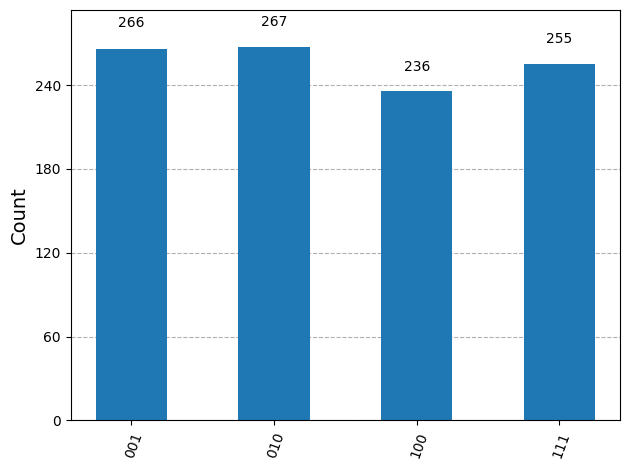

In [18]:
# Run & plot
circ.measure(q3, c3)
result = backend.run(circ, shots=1024).result()
st = result.get_counts()
plot_histogram(st)

L'exécution du circuit quantique, qui encode une chaîne de bits, nous donne en retour des informations sur le nombre de fois où chaque état spécifique a été mesuré. En se basant sur ces résultats, on peut recalculer la probabilité d’occurrence de chaque état, ce qui est représenté dans le graphique.

En observant le graphique, on voit que l’état \$\left| 001 \right\rangle\$ a été mesuré avec une probabilité d’environ 0,2. L’absence de l’état \$\left| 000 \right\rangle\$ signifie qu’il n’a pas été observé. Cela confirme qu’à la position `00` dans la chaîne de bits, la valeur est `1`.

Dans la réalité, des imperfections peuvent survenir. Ainsi, on peut utiliser les probabilités pour résoudre les ambiguïtés : si vous trouvez à la fois `000` et `001` dans vos résultats, acceptez l’état le plus probable et rejetez l’autre comme étant du bruit.

### Efficacité de la compression

L'exemple avec une chaîne de bits de longueur quatre est utile pour une explication pas à pas, mais il ne montre pas réellement la puissance de l'informatique quantique. En augmentant la longueur de la chaîne de bits, l'avantage offert par l'effet de superposition devient beaucoup plus évident.


In [19]:
for i in [4, 8, 16, 32, 256, 1024, 1024*1024, 1024*1024*1024]:
    n = math.ceil(math.log2(i)) + 1
    print("qubits %s, \t bits: %s" % (n, i))


qubits 3, 	 bits: 4
qubits 4, 	 bits: 8
qubits 5, 	 bits: 16
qubits 6, 	 bits: 32
qubits 9, 	 bits: 256
qubits 11, 	 bits: 1024
qubits 21, 	 bits: 1048576
qubits 31, 	 bits: 1073741824


Il faut garder à l'esprit que cette compression a un coût. Il est nécessaire de répéter le processus de nombreuses fois pour pouvoir lire correctement la chaîne de bits. L’avantage se manifeste surtout lorsque l’objectif n’est pas de lire la chaîne, mais d’effectuer d’autres opérations sur les données encodées, comme par exemple la comparaison de chaînes — ce vers quoi tout cela tend.

## Inversion du circuit

Nous pouvons utiliser la fonction `inverse()` pour inverser l'ordre des portes dans un circuit quantique. C'est comme exécuter le programme dans le sens inverse.

In [21]:
from qiskit import QuantumCircuit
from qiskit.circuit import Instruction

def manual_inverse_unitary_only(circuit: QuantumCircuit) -> QuantumCircuit:
    # Create a new empty circuit with the same registers
    inv_circ = QuantumCircuit(*circuit.qregs, *circuit.cregs)
    
    # Reverse iterate over instructions
    for instr, qargs, cargs in reversed(circuit.data):
        # Skip non-unitary instructions like reset or measure
        if hasattr(instr, 'inverse'):
            try:
                inv_instr = instr.inverse()
                inv_circ.append(inv_instr, qargs, cargs)
            except Exception:
                continue  # Skip instructions that can't be inverted
        else:
            continue  # Not invertible
    
    return inv_circ

#Cellule désactivée, Qiskit avant 1.0
#circ_inv = QuantumCircuit(q3, c3)
#circ_inv.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3).inverse()
#print(circ_inv)

In [22]:

decomposed_transpiled = transpile(circ, basis_gates=['u', 'cx'], optimization_level=0)
inverted = manual_inverse_unitary_only(decomposed_transpiled)

print(inverted.draw('text'))

      ┌─────────────────────┐┌───┐┌──────────────────┐┌───┐┌─────────────────┐»
q2_0: ┤ U(0,0.87673,5.4065) ├┤ X ├┤ U(-π/2,-π/2,π/2) ├┤ X ├┤ U(-π/2,-π/2,-π) ├»
      └─────────────────────┘└─┬─┘└──────────────────┘└─┬─┘└─────────────────┘»
q2_1: ─────────────────────────■────────────────────────┼─────────────────────»
                                                        │    ┌─────────────┐  »
q2_2: ──────────────────────────────────────────────────■────┤ U(-π/2,0,0) ├──»
                                                             └─────────────┘  »
c3: 3/════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌───┐┌────────────────┐
«q2_0: ┤ X ├┤ U(-π/2,π/2,2π) ├
«      └─┬─┘└┬─────────────┬─┘
«q2_1: ──■───┤ U(-π/2,0,0) ├──
«            └─────────────┘  
«q2_2: ───────────────────────
«                             
«c3: 3/═══════════════════════
«                             


/tmp/ipykernel_1727/3101455538.py:9: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in reversed(circuit.data):


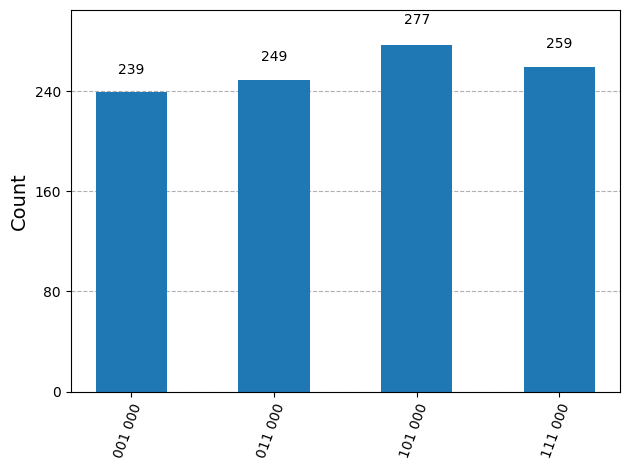

In [23]:
inverted.measure_all()
# Run & plot
result = backend.run(inverted, shots=1024).result()
st = result.get_counts()
plot_histogram(st)

Si nous exécutons le circuit inversé, nous constatons que nous n’obtenons ni la chaîne de bits inversée, ni sa version niée. En analysant les états mesurés, on observe que la chaîne de bits obtenue est `1111`.

Voyons maintenant ce qui se passe si nous attachons (ou chaînons) ce circuit inversé au circuit original que nous avions utilisé pour initialiser la puce quantique.

/tmp/ipykernel_1727/3101455538.py:9: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in reversed(circuit.data):


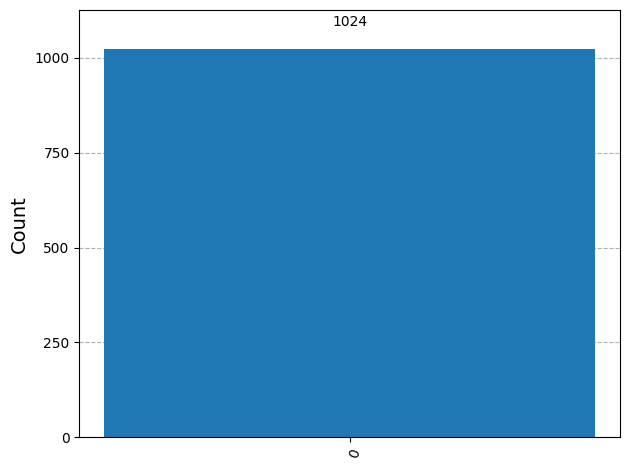

In [24]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)

# Decompose for inverse calculation
decomposed_transpiled = transpile(circ, basis_gates=['u', 'cx'], optimization_level=0)
inverted = manual_inverse_unitary_only(decomposed_transpiled)

# Concatenation
circ_sum = QuantumCircuit(q3, c3)

# Compose both circuits in sequence
circ_sum.compose(circ, inplace=True)
circ_sum.barrier()
circ_sum.compose(inverted, inplace=True)

# Run and plot
circ_sum.measure(q3, c3)
result = backend.run(circ_sum, shots=1024).result()
st = job.result().get_counts()
plot_histogram(st)

Nous revenons à l’état initial de nos qubits. Cela confirme que les portes quantiques fonctionnent parfaitement. Si nous utilisons un circuit quantique pour transformer l’état initial en un état cible, puis que nous exécutons ce circuit en sens inverse, nous revenons à l’état initial.

## Tâche : Nous souhaitons inverser la chaîne de bits (c’est-à-dire inverser chaque bit). Pour cela, nous devons appliquer une *porte de Pauli-X* à tous les qubits.

In [30]:


circ = QuantumCircuit(______, ______)  # Remplir avec les bons registres

# Initialisation de l’état quantique [0, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5]
circ.___________(____, ___)  # Compléter la méthode et les qubits

# Application d’une porte X (NOT) à tous les qubits
circ.__(____)  # Compléter avec le nom de la porte et le registre

# Ajout des mesures
circ.________(___, ___)  # Mesure des qubits vers les bits classiques

# Simulation du circuit
result = backend.run(____, shots=____).result()

# Récupération et affichage des résultats
st = result.______________()  # Compléter pour obtenir les comptages
___________(st)  # Compléter pour afficher l’histogramme

NameError: name '______' is not defined

## Tâche : décoder manuellement le mot à partir de l’histogramme (chaîne inversée)

\[Complétez cette cellule de markdown\]

Décodage de tous les bits à partir des probabilités :

```
   bs | aa v 
  ----|------- 
    0 | ?? ? 
    1 | ?? ? 
    1 | ?? ? 
    0 | ?? ?   
```
on obtient, la chaîne de bits _____.

Est-ce le résultat attendu ?

## Comparaison de chaînes binaires

Comme cela a été dit plus haut, si nous inversons le circuit et que nous l'appliquons à l'état souhaité, alors nous reviendrons à l'état initial. Mais que se passe-t-il si nous utilisons l’inverse d’un autre circuit ? Nous ne devrions retrouver l’état initial qu'avec une certaine probabilité.  Nous pouvons utiliser ce fait pour comparer la similarité entre des chaînes de bits. Plus la probabilité de retour à l’état initial est élevée, plus les chaînes binaires sont similaires.

In [154]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)

bs = {'1000': [.0, .5, .5, .0, .5, .0, .5, .0],
      '0110': [.5, .0, .0, .5, .0, .5, .5, .0],
      '1101': [.0, .5, .0, .5, .5, .0, .0, .5],
      '0011': [.5, .0, .5, .0, .0, .5, .0, .5]}

print("Similarity (probability) with 1001:")
for bitstr, ampl in bs.items():
    
    #circ_inv = QuantumCircuit(q3, c3)
    #circ_inv.initialize(ampl, q3).inverse()
    circ_temp = QuantumCircuit(q3, c3)
    circ_temp.initialize(ampl, q3)
    decomposed_transpiled = transpile(circ_temp, basis_gates=['u', 'cx'], optimization_level=0)
    inverted = manual_inverse_unitary_only(decomposed_transpiled)
    circ_sum = QuantumCircuit(q3, c3)
    circ_sum.compose(circ, inplace=True)
    circ_sum.barrier()
    circ_sum.compose(inverted, inplace=True)
    circ_sum.measure(q3, c3)
    
    result = backend.run(circ_sum, shots=1024).result()
    st = result.get_counts()
    p = st['000'] / 1024 if '000' in st.keys() else 0
    print("%s: %s" % (bitstr, p))

Similarity (probability) with 1001:
1000: 0.552734375
0110: 0


/tmp/ipykernel_679/3093821200.py:3: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in reversed(circuit.data):


1101: 0.5595703125
0011: 0.25390625


Si tous les bits sont différents (`1001` contre `0110`), alors la similarité est de 0.
S’il y a trois bits en commun, alors la probabilité est de \$0.556\$.
S’il n’y a que deux bits identiques, on obtient une probabilité de \$0.242\$.

## Next steps pour la comparaison  : 
* encoder l'algorithme classique qui mesurera la distance de Hamming entre deux chaînes de caractères.
* Lancer dans une boucle un nombre de fois élevé les deux algorithmes (classique et quantiques) et mesurer le temps de l'exécution.
* Considérer les nombre de chaînes de caractères à encoder $N$ et démontrer que le traîtement classique aura la complexité de $O(N)$, le traîtement quantique — $O(\sqrt N)$.

## Sources

Ce tutoriel est inspiré par les tutoriels "Comparing Strings with Quantum Superposition" de Rudy Raymond et Łukasz Herok.

## References

1. [Comparing Strings with Quantum Superpositon, Rudy Raymond](string_comparison.ipynb)
2. [Qiskit’s documentation - Circuits and Registers](https://qiskit.org/documentation/terra/quantum_circuits.html)
3. [Basic quantum circuit simulation in Python, Jarrod McClean](https://jarrodmcclean.com/basic-quantum-circuit-simulation-in-python/)
4. [Wikipedia - Qubit](https://en.wikipedia.org/wiki/Qubit)
5. [Wikipedia - Quantum logic gate](https://en.wikipedia.org/wiki/Quantum_logic_gate)